In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import os

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.imports import *
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.datasets import *
import matplotlib.pyplot as plt

In [6]:
print(os.listdir("../../MNIST/"))

['train.csv', 'sample_submission.csv', 'test.csv', 'digit-recognizer.zip']


In [7]:
PATH="../../MNIST/"

In [8]:
os.listdir(PATH)

['train.csv', 'sample_submission.csv', 'test.csv', 'digit-recognizer.zip']

In [9]:
train = pd.read_csv(f'{PATH}/train.csv')
test = pd.read_csv(f'{PATH}/test.csv')

In [16]:
train.index

RangeIndex(start=0, stop=42000, step=1)

In [17]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [37]:
image = train.iloc[:,1:]
label = train.iloc[:,0:1]

In [53]:
image = image.as_matrix()
image = image.reshape(-1,28,28)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
test_image = test.as_matrix()
test_image = test_image.reshape(-1,28,28)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
image[0].shape

(28, 28)

In [60]:
with np.printoptions(threshold=np.inf):
    print(image[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 207 253 23

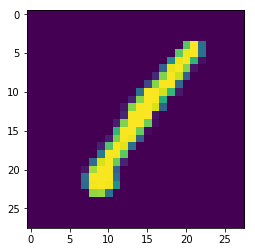

In [48]:
plt.imshow(image[0])

In [14]:
image2 = np.stack((image,)*3, axis=-1).astype('float32')
test_image2 = np.stack((test_image,)*3, axis=-1).astype('float32')

In [15]:
image2[0].shape

(28, 28, 3)

In [61]:
with np.printoptions(threshold=np.inf):
    print(image2[0])

[[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


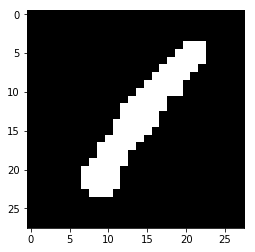

In [67]:
plt.imshow(image2[0])

In [16]:
image2.shape

(42000, 28, 28, 3)

In [ ]:
ImageDataBunch.

In [69]:
imagedl = DeviceDataLoader.create(image2[0:36000])
validdl = DeviceDataLoader.create(image2[36000:])

In [70]:
data = DataBunch.create(imagedl, validdl )

AttributeError: 'numpy.ndarray' object has no attribute 'x'

In [23]:
samples = image2.shape[0]
samples

42000

In [24]:
pc = 0.8

In [21]:
train_size = int(samples*pc)
train_size

33600

In [25]:
val_size = samples - train_size
val_size

8400

In [40]:
image.shape

(42000, 784)

In [41]:
label.shape

(42000, 1)

In [42]:
label2 = label.values.flatten()

In [46]:
label2

array([1, 0, 1, 4, ..., 1, 7, 6, 9])

In [48]:
image2 = image.as_matrix()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [58]:
x_train = image[0:train_size]
y_train = label2[0:train_size]
x_val = image[train_size:]
y_val = label2[train_size:]

In [59]:
x_train,y_train,x_val,y_val = map(torch.tensor, (x_train, y_train, x_val, y_val))

In [32]:
map(torch.tensor, (x_train, y_train, x_val, y_val))

In [56]:
y_train.max()

tensor(9)

In [60]:
x_train.shape

torch.Size([33600, 28, 28])

In [62]:
train_ds = TensorDataset(x_train,y_train)
valid_ds = TensorDataset(x_val,y_val)
bs = 64

In [66]:
data = ImageDataBunch.create(train_ds, valid_ds, bs=bs)

In [67]:
data.show_batch(rows=3, figsize=(7,6))

AttributeError: 'TensorDataset' object has no attribute 'x'

In [70]:
data.train_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f9bb3a2ef60>, device=device(type='cuda', index=0), tfms=[], collate_fn=<function data_collate at 0x7f9bb8c29d90>)

In [6]:
path = untar_data(URLs.MNIST)

In [7]:
URLs.MNIST

'https://s3.amazonaws.com/fast-ai-imageclas/mnist_png'

In [8]:
path

PosixPath('/home/ubuntu/.fastai/data/mnist_png')

In [9]:
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/mnist_png/models'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_png/training'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_png/testing')]

In [10]:
il = ImageList.from_folder(path, convert_mode='L')

In [10]:
il.items[0]

PosixPath('/home/ubuntu/.fastai/data/mnist_png/training/4/44688.png')

In [11]:
il.items[0]

PosixPath('/home/ubuntu/.fastai/data/mnist_png/training/4/44688.png')

In [11]:
sd = il.split_by_folder(train='training', valid='testing')

In [102]:
x = torch.empty(1,5,5)
y = torch.Tensor(x)
x.shape, y.shape

(torch.Size([1, 5, 5]), torch.Size([1, 5, 5]))

In [103]:
y=torch.cat((x,x))
y.shape

torch.Size([2, 5, 5])

In [109]:
sd.train[0][0].data = torch.cat((sd.train[0][0].data,sd.train[0][0].data,sd.train[0][0].data))

AttributeError: can't set attribute

In [12]:
ll = sd.label_from_folder()

In [13]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [14]:
ll = ll.transform(tfms)

In [15]:
ll.train[0]

(Image (1, 28, 28), Category 4)

In [46]:
x,y = ll.train[0]

In [47]:
x,y

(Image (1, 28, 28), Category 4)

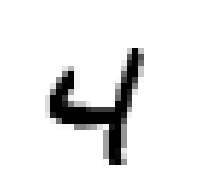

In [48]:
x.show()

In [61]:
x_ = torch.empty(3, x.data.shape[1], x.data.shape[2])
x_[0,:,:] = x.data
x_[1,:,:] = x.data
x_[2,:,:] = x.data
x_

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [15]:
defaults.cmap='binary'

In [16]:
bs = 64

In [17]:
data = ll.databunch(bs=bs).normalize()

In [30]:
data

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
4,4,4,4,4
Path: /home/ubuntu/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
4,4,4,4,4
Path: /home/ubuntu/.fastai/data/mnist_png;

Test: None

In [18]:
data.train_ds[0][0]

In [20]:
data.c

10

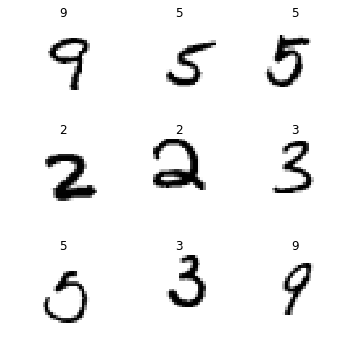

In [31]:
data.show_batch(rows=3, figsize=(5,5))

In [31]:
data.export()

In [43]:
pp = path/'export.pkl'

In [47]:
with open(pp, 'rb') as f:
    x_train = pickle.load(f)

In [50]:
data

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
4,4,4,4,4
Path: /home/ubuntu/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
4,4,4,4,4
Path: /home/ubuntu/.fastai/data/mnist_png;

Test: None

In [48]:
xb, yb = data.one_batch()
xb.shape, yb.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [22]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate, bn_final=True)

In [19]:
def conv(ni, nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1, dilation=1, groups=1, bias=True)

In [20]:
model = nn.Sequential(
        conv(1,8),   # 28/2 = 14
        nn.BatchNorm2d(8),
        nn.ReLU(),
        conv(8,16),  # 14/2 = 7
        nn.BatchNorm2d(16),
        nn.ReLU(),
        conv(16, 32), # 7/2 = 4
        nn.BatchNorm2d(32),
        nn.ReLU(),
        conv(32,16), # 4/2 = 2
        nn.BatchNorm2d(16),
        nn.ReLU(),
        conv(16,10), # 2/2 = 1
        nn.BatchNorm2d(10),
        Flatten()  # remove (1,1) grid
        )

In [27]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [22]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
______________________________________________________________

In [58]:
xb.shape

torch.Size([64, 1, 28, 28])

In [59]:
xb = xb.cuda()

In [60]:
xb.shape

torch.Size([64, 1, 28, 28])

In [61]:
model(xb).shape

torch.Size([64, 10])

In [24]:
learn.lr_find(num_it=120)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


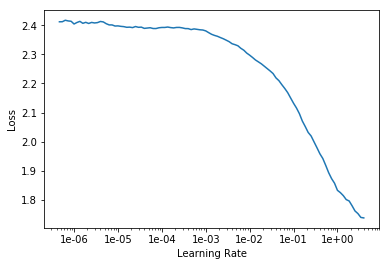

In [25]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.108568,0.135441,0.955700,00:16
1,0.175847,0.124874,0.961500,00:16
2,0.188898,0.173529,0.942100,00:16
3,0.154949,0.098086,0.968200,00:16
4,0.159725,0.102506,0.969000,00:16
5,0.125746,0.076030,0.975400,00:16
6,0.116404,0.081075,0.976700,00:16
7,0.078698,0.046336,0.986000,00:16
8,0.065443,0.031915,0.990700,00:16
9,0.046147,0.029747,0.991400,00:16


In [51]:
interp = ClassificationInterpretation.from_learner(learn)

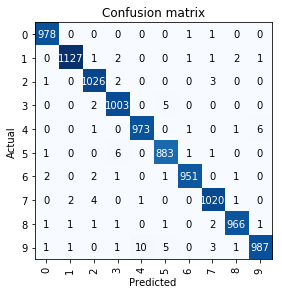

In [54]:
interp.plot_confusion_matrix()

In [55]:
interp.top_losses(k=10)

(tensor([7.1709, 5.5136, 4.8226, 4.5976, 4.5841, 4.1312, 4.0130, 3.9881, 3.9325,
         3.7987]),
 tensor([9635, 5453, 1582, 8207, 8841, 7384, 4711, 4221, 4835, 1406]))

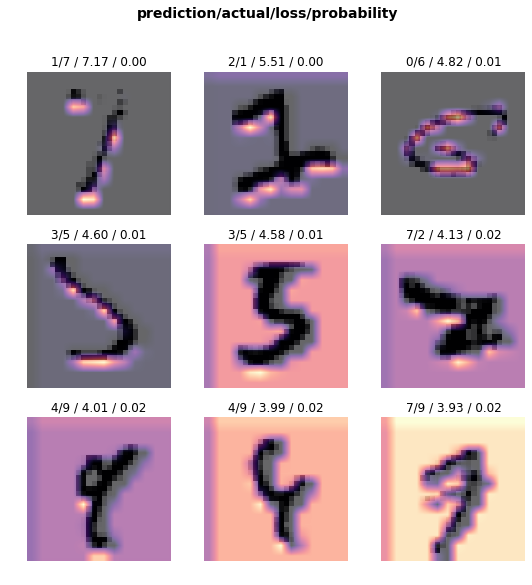

In [56]:
interp.plot_top_losses(9, figsize=(9,9))

In [67]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [68]:
model = nn.Sequential(
        conv2(1,8),
        conv2(8,16),
        conv2(16,32),
        conv2(32,16),
        conv2(16,10),
        Flatten())

In [75]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [76]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          72         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [16, 7, 7]           1,152      True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
Conv2d               [32, 4, 4]           4,608      True      
______________________________________________________________

In [71]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


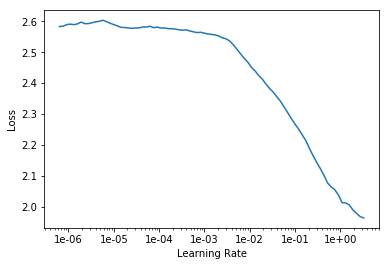

In [72]:
learn.recorder.plot()

In [77]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.086520,0.047893,0.984600,00:16
1,0.169091,0.128102,0.958300,00:16
2,0.173784,0.102039,0.968000,00:16
3,0.165961,0.168917,0.946800,00:16
4,0.142029,0.078518,0.975500,00:16
5,0.130382,0.090748,0.971100,00:16
6,0.089206,0.060835,0.980700,00:16
7,0.079121,0.041634,0.987000,00:16
8,0.061363,0.031123,0.989800,00:16
9,0.047502,0.028486,0.991100,00:16


In [78]:
help(res_block)

Help on function res_block in module fastai.layers:

res_block(nf, dense: bool = False, norm_type: Union[fastai.layers.NormType, NoneType] = <NormType.Batch: 1>, bottle: bool = False, **conv_kwargs)
    Resnet block of `nf` features. `conv_kwargs` are passed to `conv_layer`.



In [79]:
doc(res_block)

In [81]:
model = nn.Sequential(
        conv2(1,8),
        res_block(8),
        conv2(8,16),
        res_block(16),
        conv2(16,32),
        res_block(32),
        conv2(32,16),
        res_block(16),
        conv2(16,10),
        Flatten())

In [87]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [83]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


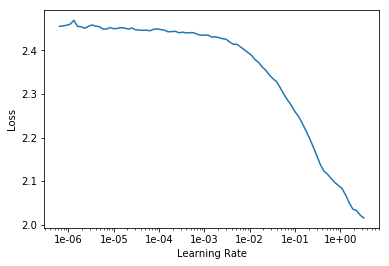

In [84]:
learn.recorder.plot()

In [86]:
learn.fit_one_cycle(12, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.200131,0.157885,0.952600,00:23
1,0.150710,0.222144,0.931000,00:23
2,0.142028,0.115986,0.964000,00:23
3,0.129183,0.178543,0.942000,00:23
4,0.103134,0.070036,0.979300,00:23
5,0.083505,0.217908,0.935000,00:23
6,0.091539,0.074611,0.977500,00:23
7,0.074032,0.053499,0.984500,00:23
8,0.058933,0.038941,0.988700,00:23
9,0.042149,0.031612,0.990900,00:23


In [88]:
learn.fit_one_cycle(12, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.030043,0.026829,0.991500,00:23
1,0.055493,0.038808,0.988800,00:23
2,0.085555,0.177961,0.940000,00:23
3,0.081851,0.063572,0.981400,00:23
4,0.076370,0.056425,0.981500,00:23
5,0.073511,0.060437,0.982500,00:23
6,0.063770,0.046692,0.987200,00:23
7,0.047922,0.031852,0.990200,00:23
8,0.039716,0.026536,0.991400,00:23
9,0.029647,0.017222,0.994900,00:23
